Эту модель использую часто, работает хорошо.

In [102]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from html import unescape
from functools import partial
from string import punctuation

from sklearn.model_selection import train_test_split
from gensim.corpora import Dictionary
from gensim.models import LdaModel

from collections import defaultdict
from sklearn.decomposition import PCA

__load previous data__

In [67]:
# concatenated preprocessed data from hw1
data = pd.Series(pd.read_pickle('../hw1/lemma.pkl'))

__LDA model__

In [68]:
# prepare dictionary
dictionary = Dictionary(data)      # я же правильно понимаю, что сюда можно подать объекты, разбитые на n-граммы?
corpus = data.apply(dictionary.doc2bow)

In [78]:
NUM_TOPICS = 20
NUM_WORDS = 10

# fit
train, valid = train_test_split(corpus, test_size=0.2, random_state=13)     # разделяю просто так, по привычке
lda = LdaModel(train, NUM_TOPICS, id2word=dictionary, random_state=19)

# get topics
topics = lda.show_topics(NUM_TOPICS, NUM_WORDS, formatted=False)
word_topics = pd.DataFrame([[w for w, _ in topic] for _, topic in topics])
proba_topics =pd.DataFrame([[p for w, p in topic] for n, topic in topics])
pd.DataFrame(word_topics)

,0,1,2,3,4,5,6,7,8,9
0,blog,,silver,race,gold,bear,polar,place,live,forex
1,work,happi,fit,boy,amaz,mindset,relax,stay,move,lead
2,bihday,need,look,bless,happi,tear,grate,busi,citi,forward
3,friday,tomorrow,girl,video,tell,moment,long,comment,sexi,win
4,day,father,happi,love,dad,fathersday,sunday,feel,today,wish
5,make,peopl,know,life,ever,one,happen,tri,got,feel
6,oh,god,ye,school,drink,im,wow,could,,pic
7,u,orlando,play,famili,let,right,laugh,would,call,get
8,posit,affirm,get,today,post,face,free,word,plea,hard
9,watch,rip,yet,polit,,photo,libtard,liber,choos,might


Сразу стали видны недостатки предобработки :)

In [162]:
# collect LDA vectors for all data
lda_tuples = [lda[doc] for doc in corpus]
topics = [defaultdict(int, lt) for lt in lda_tuples]
vectors = np.array([[topic[i] for i in range(NUM_TOPICS)] for topic in topics])
labels = vectors.argmax(axis=1)
vectors.shape

(49159, 20)

__vizualization__

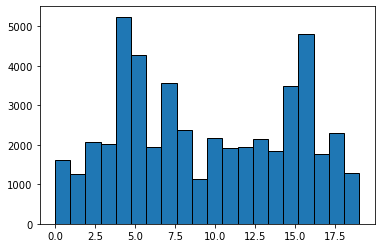

In [173]:
# распределение топиков
plt.hist(labels, edgecolor='black', bins=20);

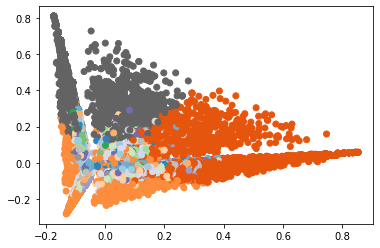

In [180]:
# PCA 2d
compressed = PCA(2, random_state=11).fit_transform(vectors)
plt.scatter(compressed.T[0], compressed.T[1], c=labels, cmap=plt.cm.tab20c);

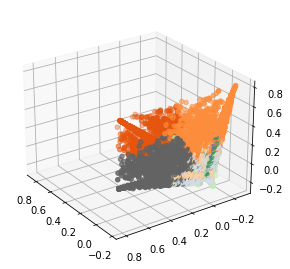

In [179]:
# PCA 3d
compressed = PCA(3, random_state=11).fit_transform(vectors)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(compressed.T[0], compressed.T[1], compressed.T[2], c=labels, cmap=plt.cm.tab20c)
ax.view_init(elev=25, azim=145)
plt.show()

In [90]:
#